# 장경희 강사님_Python으로 배우는 기초 통계와 통계 기반 빅데이터 분석(1)

# 1. 질문하기
- 데이터가 주어진 상태에서 질문을 할 수도 있고, 질문에 답할 수 있는 데이터를 수집할 수도 있음

### 데이터 구성
**datetime** : hourly date + timestamp  
**season** : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울  
**holiday**: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날  
**workingday**: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일  
**weather**:  
- 1 = 맑음, 약간 구름 낀 흐림  
- 2 = 안개, 안개 + 흐림  
- 3 = 가벼운 눈, 가벼운 비 + 천둥  
- 4 = 심한 눈/비, 천둥/번개  

**temp**: 온도(섭씨)   
**atemp**: 체감온도(섭씨)  
**humidity**: 상대습도  
**windspeed**: 풍속  
**casual**: 사전에 등록되지 않는 사용자가 대여한 횟수  
**registered**: 사전에 등록된 사용자가 대여한 횟수  
**count**: 대여 횟수  


- 종속 변수가 count라고 할 때, 독립변수라고 말할 수 있는 것들은 무엇인가?

2. 데이터 랭글링
- 수집, 평가, 정제

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 수집
bike = pd.read_csv('./file/0512/bike_train.csv')
bike.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# 데이터 평가
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# 데이터 정제, 결측값 확인
bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
# 결측값 제거
bike.dropna(inplace=True)

In [6]:
# 결측값 개수 확인
bike.isnull().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
# 이상치 확인
bike.describe()

# 이상치 제거, 값이 0 이하인 값 제거
bike = bike[bike['count'] > 0]
bike.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
# datetime열 제거
copy_bike = bike.copy()
copy_bike.drop('datetime', axis=1, inplace=True)
copy_bike.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# 상관계수 확인
copy_bike.corr()
# 그냥 뽑으멘 데이터를 제대로 사용할 수 없음

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [10]:
# datetime열 데이터 형식이 object 타입이므로, datetime 타입으로 변환
bike['datetime'] = pd.to_datetime(bike['datetime'])

# datetime을 년, 월, 일, 시로 분해
copy_bike = bike.copy()
copy_bike['year'] = copy_bike['datetime'].dt.year
copy_bike['month'] = copy_bike['datetime'].dt.month
copy_bike['day'] = copy_bike['datetime'].dt.day
copy_bike['hour'] = copy_bike['datetime'].dt.hour
copy_bike.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [11]:
print(copy_bike['datetime'].dtype)  # datetime64[ns]가 나와야 정상

datetime64[ns]


In [12]:
copy_bike.drop('datetime', axis=1, inplace=True)
copy_bike.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


**질문**
- 질문 1. 어떤 기후 특성이 자전거 대여량에 영향을 미칠까?
- 질문 2. 어떤 시간대(요일, 달, 계절..)에 대여량이 많을까?

In [13]:
copy_bike = bike.copy()
x = copy_bike.iloc[0, 0]

In [14]:
type(x)

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
x_dt = pd.to_datetime(x)
x_dt

Timestamp('2011-01-01 00:00:00')

In [16]:
x_dt.year

2011

In [17]:
x_dt.month

1

In [18]:
copy_bike['datetime'] = copy_bike['datetime'].apply(pd.to_datetime)

In [19]:
copy_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [20]:
def get_year(x):
    return x.year

get_year(x_dt)

2011

In [21]:
copy_bike['datetime'].apply(get_year)

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [22]:
copy_bike['datetime'].apply(lambda x: x.year) # bike['datetime'].apply(get_year) 과 동일

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [23]:
copy_bike['year'] = copy_bike['datetime'].apply(lambda x: x.year)
copy_bike['month'] = copy_bike['datetime'].apply(lambda x: x.month)
copy_bike['hour'] = copy_bike['datetime'].apply(lambda x: x.hour)
copy_bike['dayofweek'] = copy_bike['datetime'].apply(lambda x: x.dayofweek)

In [24]:
copy_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  hour        10886 non-null  int64         
 15  dayofweek   10886 non-null  int64         
dtypes: datetime64[ns](1), 

# 데이터 탐색

<Axes: xlabel='temp', ylabel='count'>

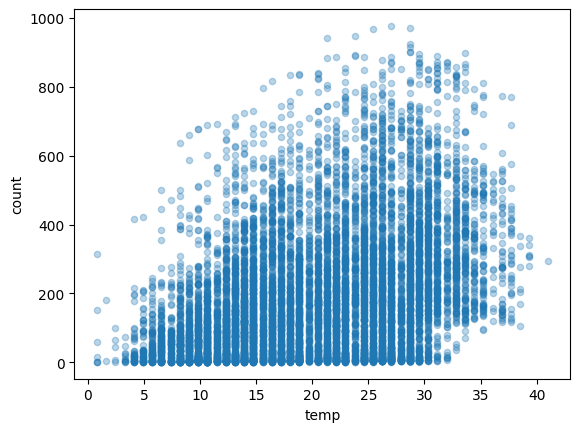

In [25]:
copy_bike.plot(kind='scatter', x='temp', y='count', alpha=0.3)

In [26]:
copy_bike.corr()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
datetime,1.000000,0.480021,0.010988,-0.003658,-0.005048,0.180986,0.181823,0.032856,-0.086888,0.172728,0.314879,0.310187,0.866570,0.494087,-0.005663,-0.004676
season,0.480021,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,-0.006546,-0.010553
holiday,0.010988,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.000354,-0.191832
workingday,-0.003658,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.002780,-0.704267
weather,-0.005048,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.022740,-0.047692
temp,0.180986,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.145430,-0.038466
atemp,0.181823,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.140343,-0.040235
humidity,0.032856,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.278011,-0.026507
windspeed,-0.086888,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.146631,-0.024804
casual,0.172728,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.302045,0.246959


In [27]:
copy_bike.corr()['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
datetime      0.310187
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
workingday    0.011594
dayofweek    -0.002283
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

**질문1에 대한 분석 결과** :
- 온도와 체감온도가 대여량에 영향을 미칠것으로 보임 (약한 양의 상관관계)
- 습도도 대여량에 영향을 미칠 것으로 보임(약한 음의 상관관계)

질문 2. 어떤 시간대(요일, 달, 계절..)에 대여량이 많을까?

**시각화 참고**
- 범주형 데이터에 따른 수치형 데이터의 요약 정보를 파악할 때 막대 그래프 활용
- 시간 정보 중 범주형 데이터는?
  - year, month, dayofweek, season 등이 범주형 데이터
- 관심이 있는 수치형 데이터는?
  - count(대여량)

<Axes: xlabel='month', ylabel='count'>

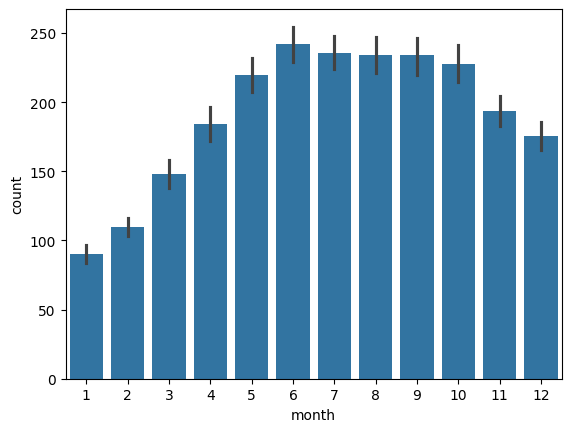

In [28]:
# sns.barplot(x= 범주형 데이터, y= 관심 수치형 데이터)
sns.barplot(data= copy_bike, x= 'month' , y= 'count')

# 기술통계 vs 추측통계

In [29]:

# 한글 폰트 나오게 하기
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 'Malgun Gothic'은 Windows 기본 한글 폰트)
plt.rc('font', family='Malgun Gothic')

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

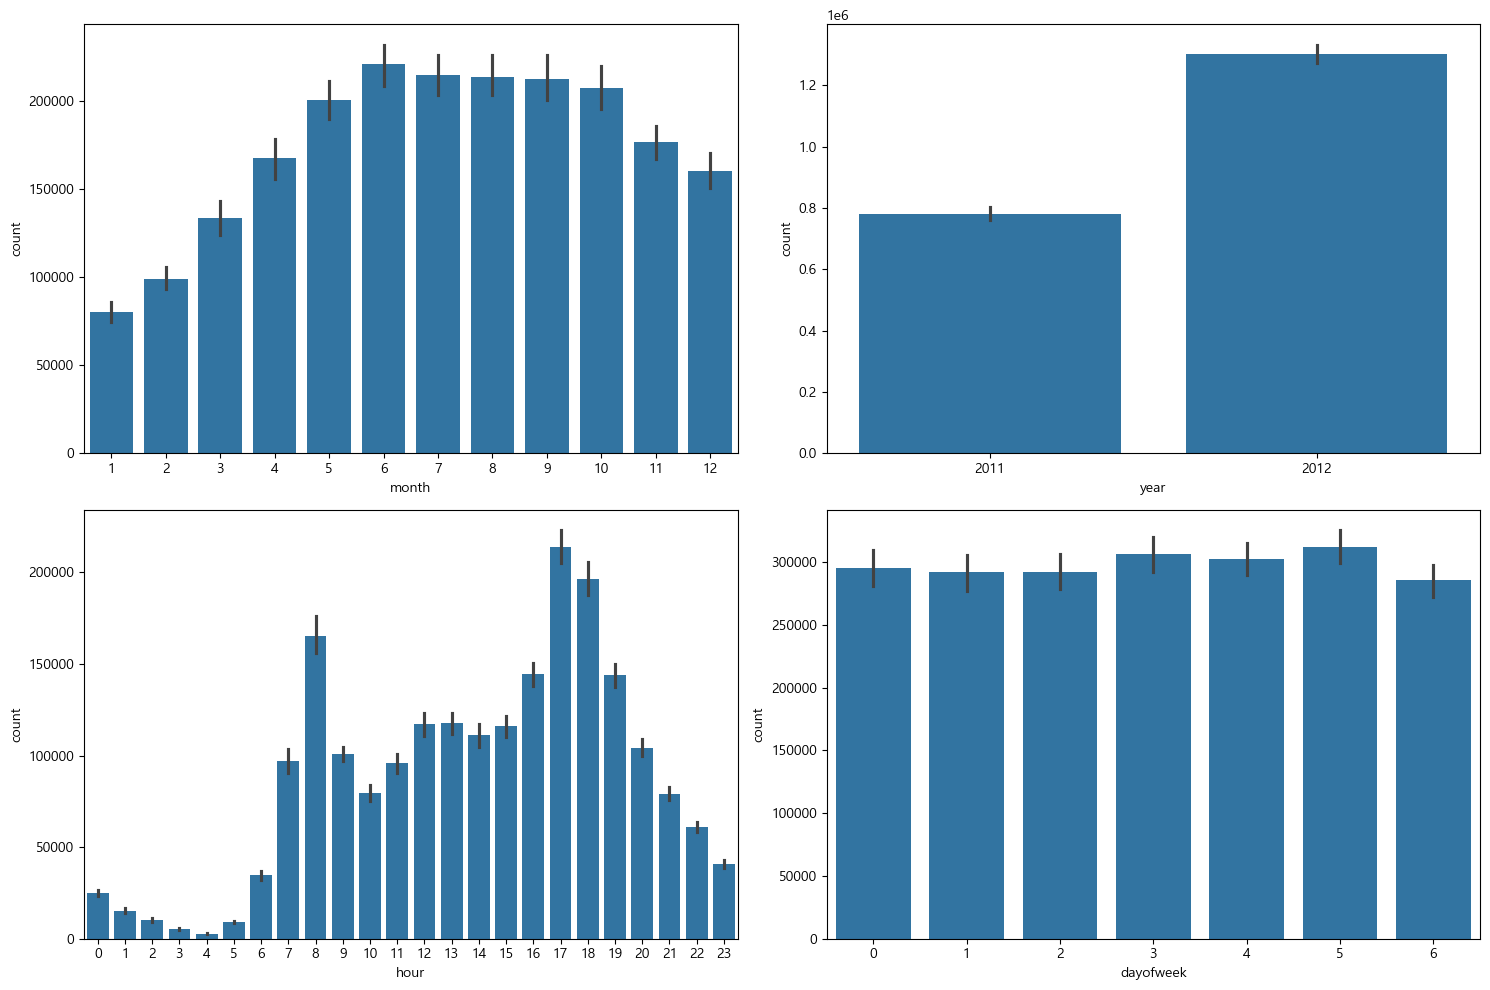

In [30]:
# 표 4등분해서 데이터 뽑기
# year, month, hour, dayofweek에 대해 count의 합 시각화 하기
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(data=copy_bike, x='month' , y='count', estimator='sum', ax=axes[0, 0])
sns.barplot(data=copy_bike, x='year' , y='count', estimator='sum', ax=axes[0, 1])
sns.barplot(data=copy_bike, x='hour' , y='count', estimator='sum', ax=axes[1, 0])
sns.barplot(data=copy_bike, x='dayofweek' , y='count', estimator='sum', ax=axes[1, 1])

plt.tight_layout()
plt.show()

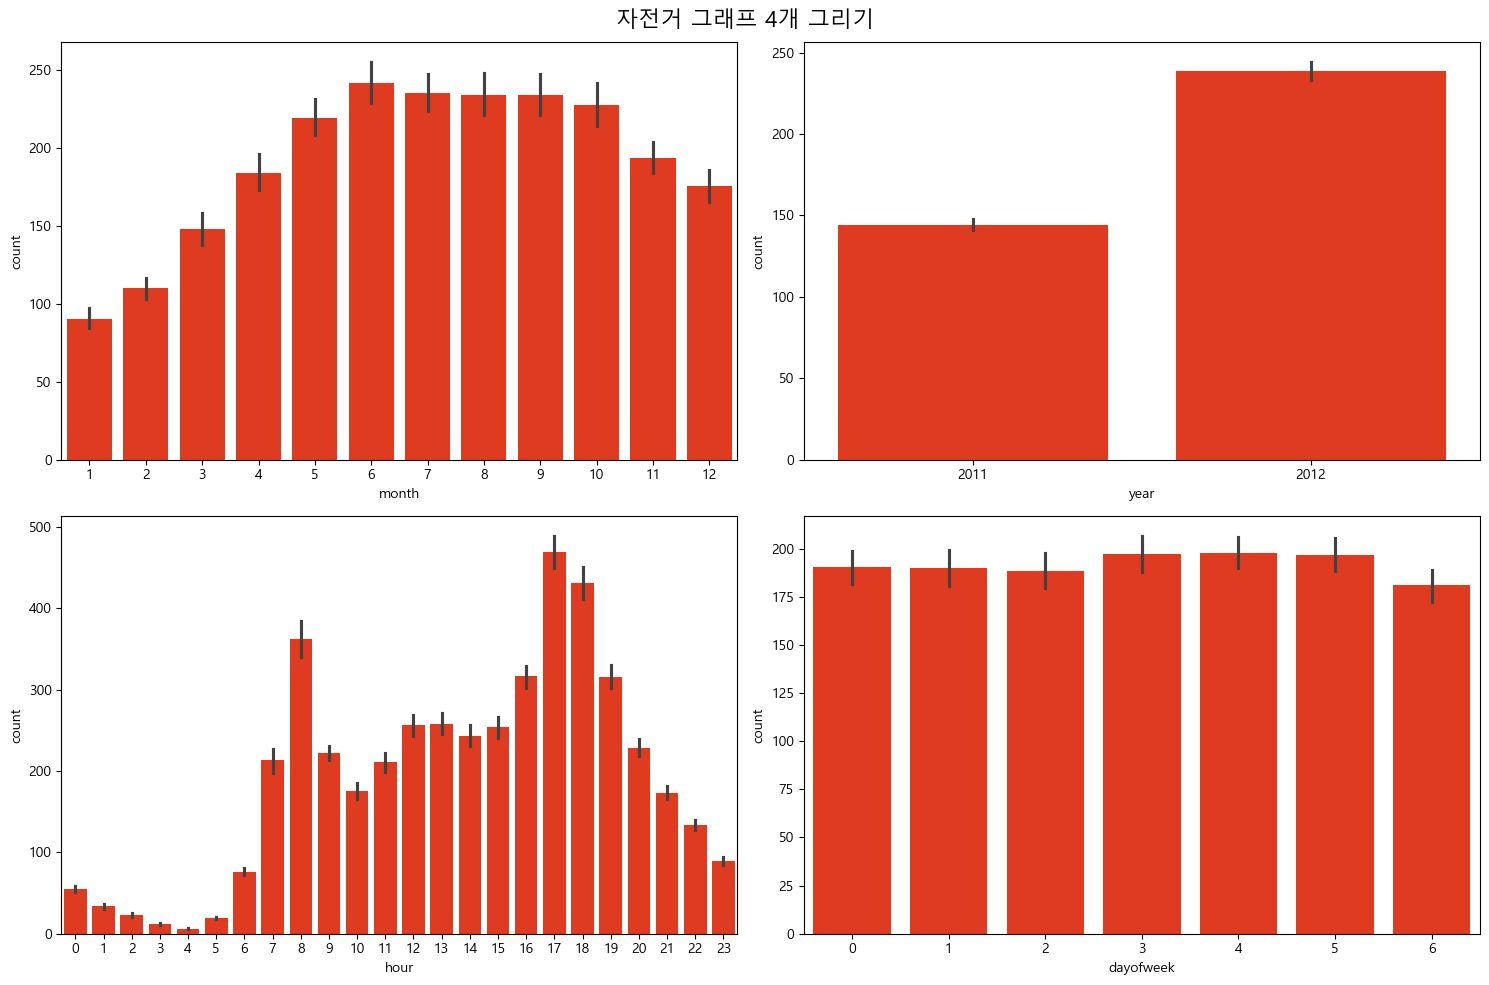

In [41]:
# 표 4등분해서 데이터 뽑기
# year, month, hour, dayofweek에 대해 count의 평균 시각화 하기
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 제목 붙이기
fig.suptitle("자전거 그래프 4개 그리기", fontsize=16)

sns.barplot(data=copy_bike, x='month' , y='count', ax=axes[0, 0], color='#FF2400')

sns.barplot(data=copy_bike, x='year' , y='count', ax=axes[0, 1], color='#FF2400')

sns.barplot(data=copy_bike, x='hour' , y='count', ax=axes[1, 0], color='#FF2400')

sns.barplot(data=copy_bike, x='dayofweek' , y='count', ax=axes[1, 1], color='#FF2400')

plt.tight_layout()
plt.show()

**질문 2에 대한 분석 결과**
- 연도별 평균 대여량이 2011년도보다 2012년도에 더 많음
- 월별 평균 대여량은 6월에 가장 많았고 7~10월에도 많음. 1월에 가장 적음
- 시간대별 평균 대여량은 8시 전후와 오후 5~6시 부근에 많음
- (todo)** 시간대별 평균대여량을 휴일과 공휴일로 나눠서 시각화 해보기

# 1. 질문하기
- 데이터가 주어진 상태에서 질문을 할 수도 있고, 질문에 답할 수 있는 데이터를 수집할 수도 있음

### 데이터 구성
**datetime** : hourly date + timestamp  
**season** : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울  
**holiday**: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날  
**workingday**: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일  
**weather**:  
- 1 = 맑음, 약간 구름 낀 흐림  
- 2 = 안개, 안개 + 흐림  
- 3 = 가벼운 눈, 가벼운 비 + 천둥  
- 4 = 심한 눈/비, 천둥/번개  

**temp**: 온도(섭씨)   
**atemp**: 체감온도(섭씨)  
**humidity**: 상대습도  
**windspeed**: 풍속  
**casual**: 사전에 등록되지 않는 사용자가 대여한 횟수  
**registered**: 사전에 등록된 사용자가 대여한 횟수  
**count**: 대여 횟수  

In [35]:
# 시간대별 평균대여량을 휴일과 공휴일로 나눠서 시각화 해보기
# 이상치 제거, 값이 0 이하인 값 제거
only_holiday_df = copy_bike.loc[copy_bike['holiday'] == 1, ['holiday', 'count', 'hour']]

# not_workingday
not_workingday_df = copy_bike.loc[copy_bike['workingday'] == 1, ['workingday', 'count', 'hour']]
# copy_bike.head()

In [36]:
only_holiday_df.describe()

,holiday,count,hour
count,311.0,311.000000,311.000000
mean,1.0,185.877814,11.527331
std,0.0,168.300531,6.927625
min,1.0,1.000000,0.000000
25%,1.0,38.500000,6.000000
50%,1.0,133.000000,12.000000
75%,1.0,308.000000,17.500000
max,1.0,712.000000,23.000000


In [37]:
not_workingday_df.describe()

,workingday,count,hour
count,7412.0,7412.000000,7412.000000
mean,1.0,193.011873,11.554776
std,0.0,184.513659,6.913725
min,1.0,1.000000,0.000000
25%,1.0,41.000000,6.000000
50%,1.0,151.000000,12.000000
75%,1.0,277.000000,18.000000
max,1.0,977.000000,23.000000


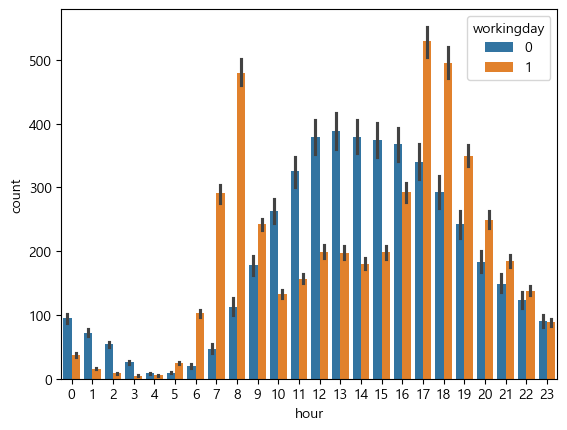

In [50]:
sns.barplot(data=copy_bike, x='hour', y='count', hue='workingday')
plt.show()

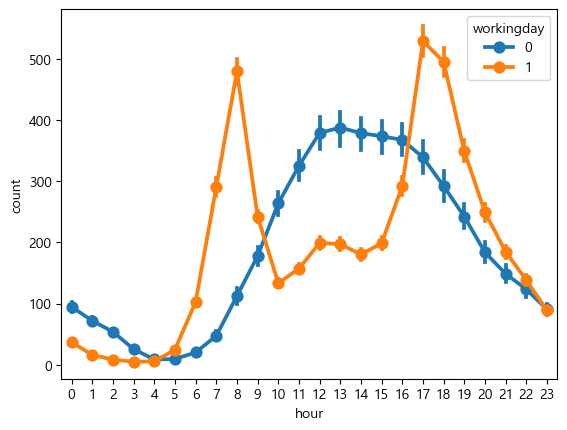

In [56]:
sns.pointplot(data=copy_bike, x='hour', y='count', hue='workingday')
plt.show()

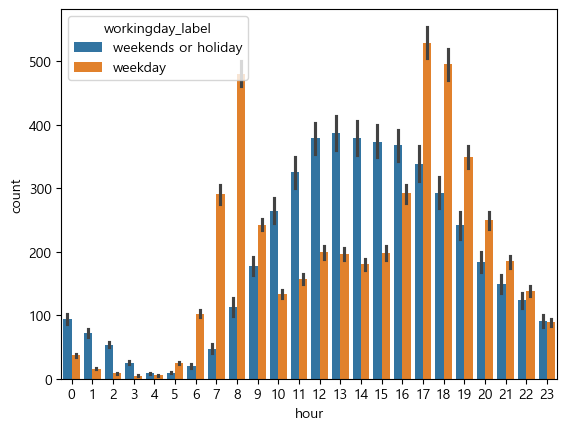

In [53]:
copy_bike['workingday_label'] = copy_bike['workingday'].apply(lambda x: 'weekday' if x == 1 else 'weekends or holiday')

sns.barplot(data=copy_bike, x='hour', y='count', hue='workingday_label')
plt.show()

In [54]:
copy_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek,workingday_label
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5,weekends or holiday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,weekends or holiday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5,weekends or holiday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5,weekends or holiday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5,weekends or holiday
